<div style="text-align: center;">
    <h1>Seoul Bike Sharing Exploratory Data Analysis </h1>
</div>

![Your Image](https://c0.wallpaperflare.com/preview/990/405/199/south-korea-seoul-yellow-korean.jpg)


### Problem Statement: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.shape

(8760, 14)

In [6]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [165]:
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### Variable Selection and Typecasting 

In [166]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* There are no null values in the data.
* The data is hourly count of bike rented with weather conditions at time. 
* Rented bike count is the target variable. 
* Extract features such as day, month and year from Date column.
* And assign appropriate data types for features. 

In [167]:
df = data.copy()

In [168]:
df['Date'] = pd.DatetimeIndex(df['Date'])

In [169]:
date = pd.DatetimeIndex(data['Date'])

In [170]:
df['year'] = date.year
df['month'] = date.month
df['day'] = date.day_of_week

In [171]:
df.drop('Date',axis=1,inplace = True)

In [172]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3


In [173]:
df.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
year                           int32
month                          int32
day                            int32
dtype: object

In [174]:
df['Seasons'] = df['Seasons'].astype('category')
df['Holiday'] = df['Holiday'].astype('category')
df['Functioning Day'] = df['Functioning Day'].astype('category')

In [175]:
df['Humidity(%)'] = df['Humidity(%)'].astype('float64')                     

In [176]:
df.dtypes

Rented Bike Count               int64
Hour                            int64
Temperature(°C)               float64
Humidity(%)                   float64
Wind speed (m/s)              float64
Visibility (10m)                int64
Dew point temperature(°C)     float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Seasons                      category
Holiday                      category
Functioning Day              category
year                            int32
month                           int32
day                             int32
dtype: object

### Exploratory Data Analysis

In [177]:
df.nunique().sort_values()

Holiday                         2
Functioning Day                 2
year                            2
Seasons                         4
day                             7
month                          12
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

* Data is consistent with 12 months, 24 hours,4 seasons and 2 years. 

### Univariate Data Analysis: Continuous Variable 

In [179]:
 conti_data = list(df.select_dtypes(include=['float64','int64']).columns)

In [180]:
conti_data

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [181]:
def conti_plots(data, columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2  # Ensure that there is at least one row
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))  # Adjust figsize as needed

    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2

        maxi = round(data[column].max(), 2)
        mini = round(data[column].min(), 2)
        rani = round(maxi - mini, 2)
        meani = round(data[column].mean(), 2)
        mediani = round(data[column].median(), 2)
        std_dev = round(data[column].std(), 2)
        skewi = round(data[column].skew(), 2)
        kurt = round(data[column].kurtosis(), 2)

        points = np.array([round(meani - std_dev, 2), round(meani + std_dev, 2)])

        # Use axes[row, col] to select the appropriate subplot
        axes[row, col].set_title(f'{column}')
        sns.kdeplot(x=data[column], fill=True, ax=axes[row, col])
    
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label=f"min&max={mini}&{maxi}", ax=axes[row, col])
        sns.scatterplot(x=[meani], y=[0], color='red', label=f"mean={meani}", ax=axes[row, col])
        sns.scatterplot(x=[mediani], y=[0], color='blue', label=f"median={mediani}", ax=axes[row, col])
        axes[row, col].set_xlabel(f'{column}', fontsize=15)
        axes[row, col].set_ylabel('density')
        axes[row, col].set_title(f'within 1 std_dev={points[0]} to {points[1]}; kurtosis={kurt};\n skew = {skewi}; range = {rani}')

    plt.tight_layout()
    plt.show()

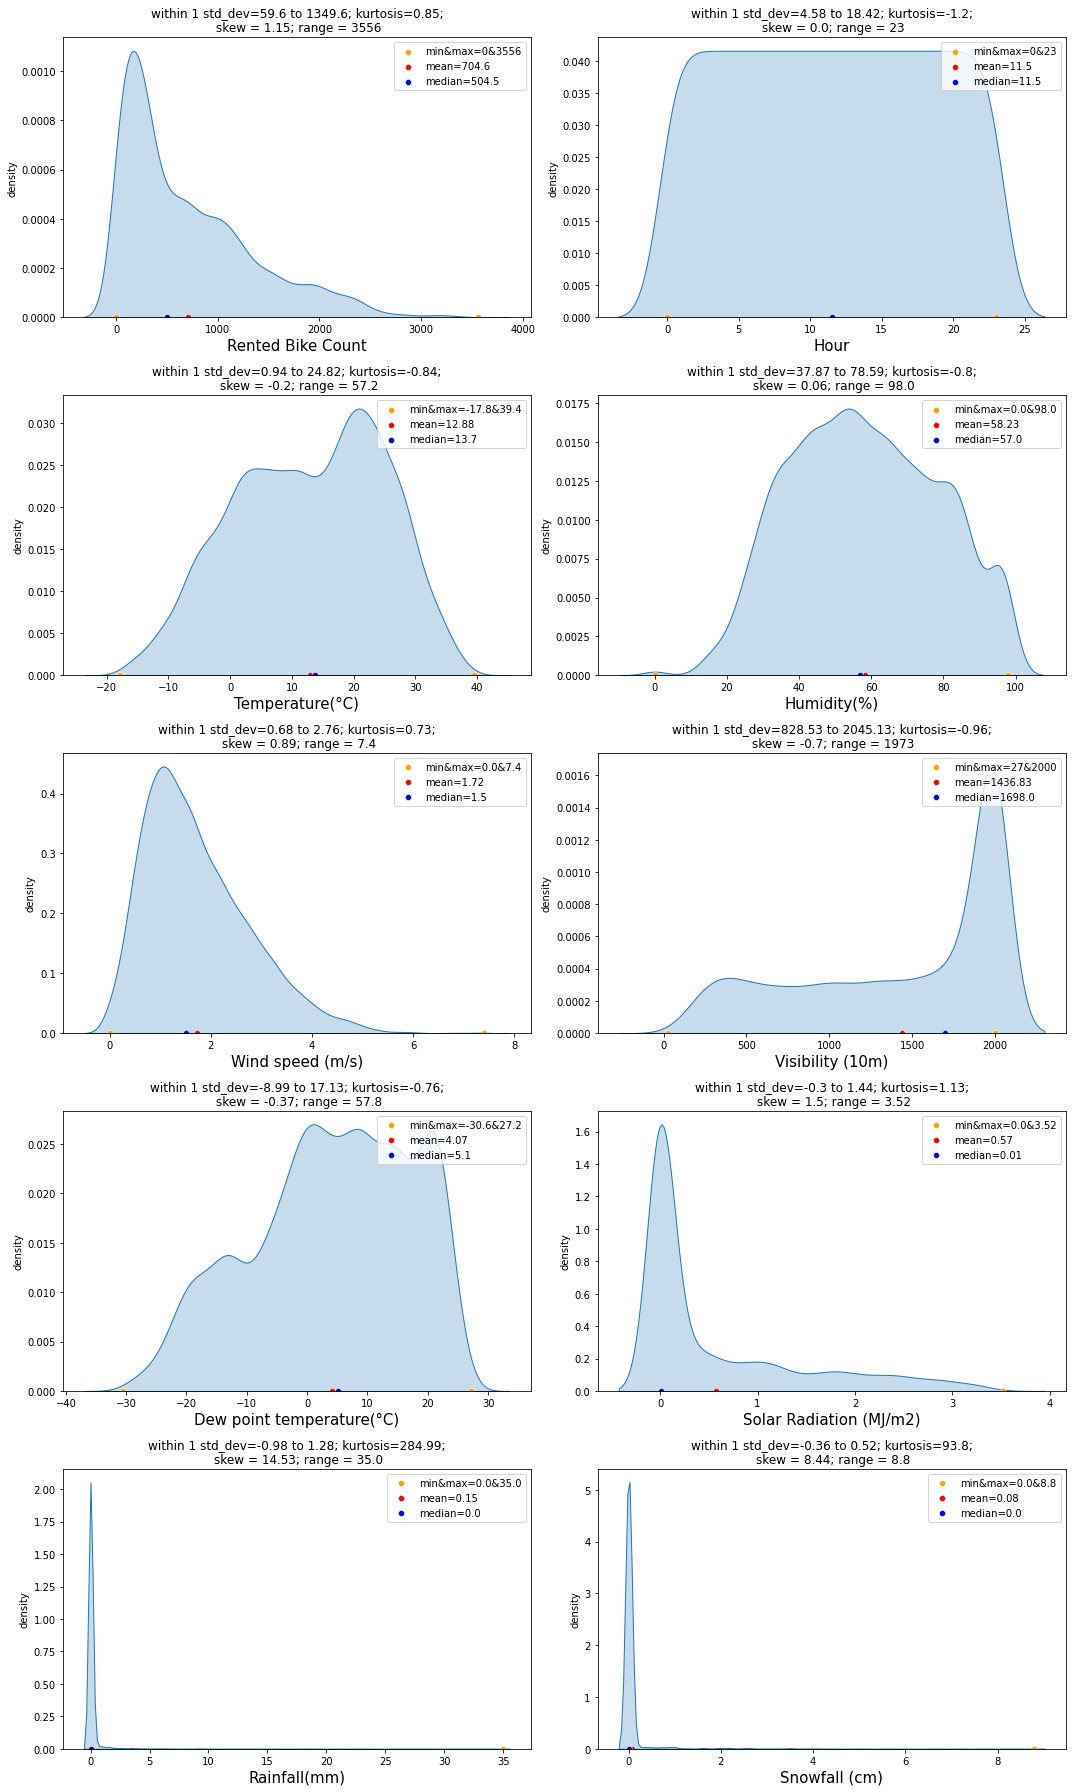

In [182]:
conti_plots(df,conti_data)

* Box plot of same features to check outliers. 

In [183]:
def box_plots(data, columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows *3 ))

    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2

        # Use axes[row, col] to select the appropriate subplot
        axes[row, col].set_title(f'{column}')
        sns.boxplot(x=data[column], ax=axes[row, col])

    plt.tight_layout()
    plt.show()

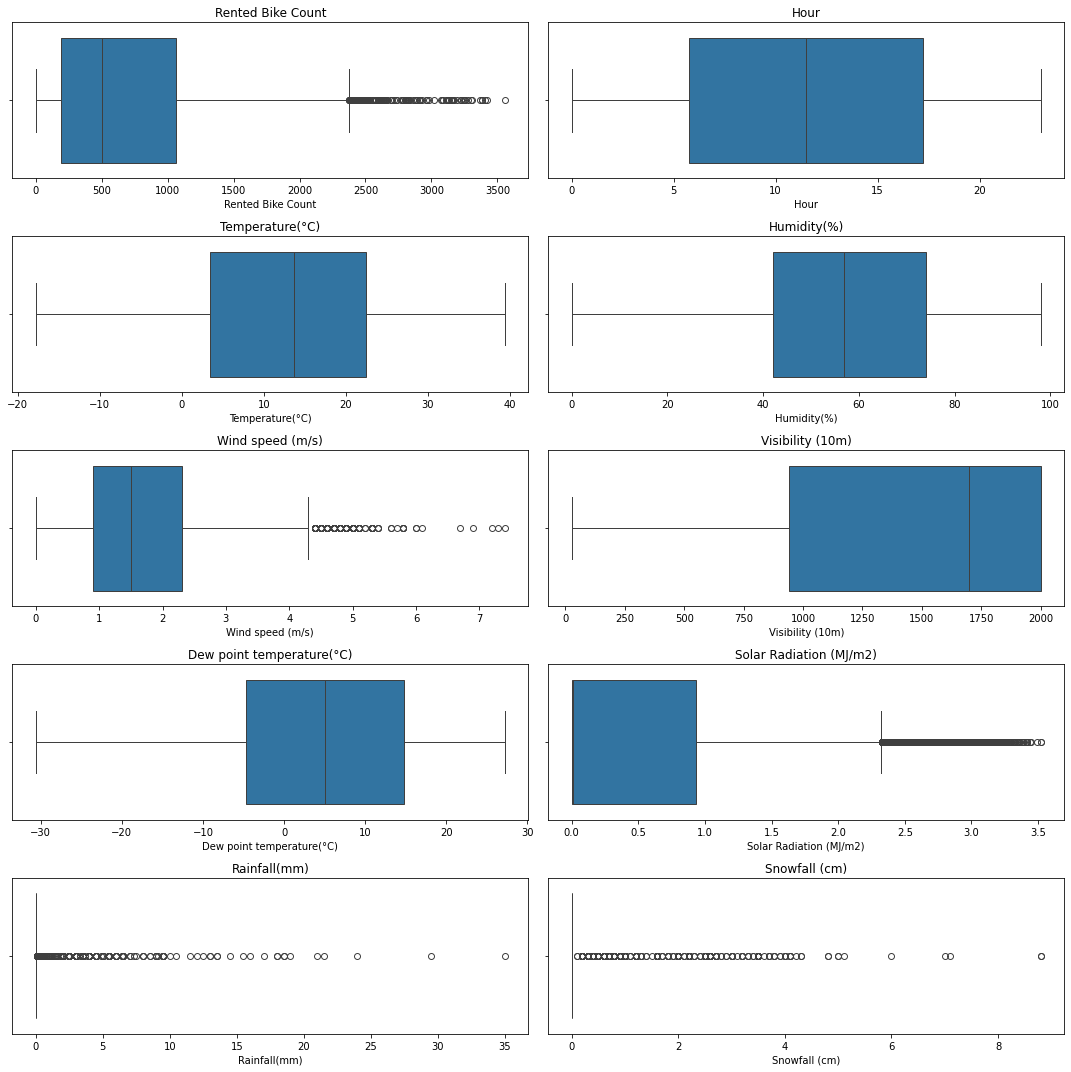

In [184]:
box_plots(df, conti_data)

* We will transform these variables into more normal distributions in data preprocessing part of the book.

### Univariate Data Analysis: Categorical Variable 

In [185]:
cat_data = list(df.select_dtypes(include=['category']).columns)

In [186]:
def Cat_plot(data,var):
    
    size = len(var)
    plt.figure(figsize=(7*size,4))
    
    for j,i in enumerate(var):
        
        plt.subplot(1,size,j+1)
        sns.countplot(x=data[i])
        plt.xlabel(f'{i}', fontsize = 20)
        plt.ylabel('density')
        plt.title(f'{i}')

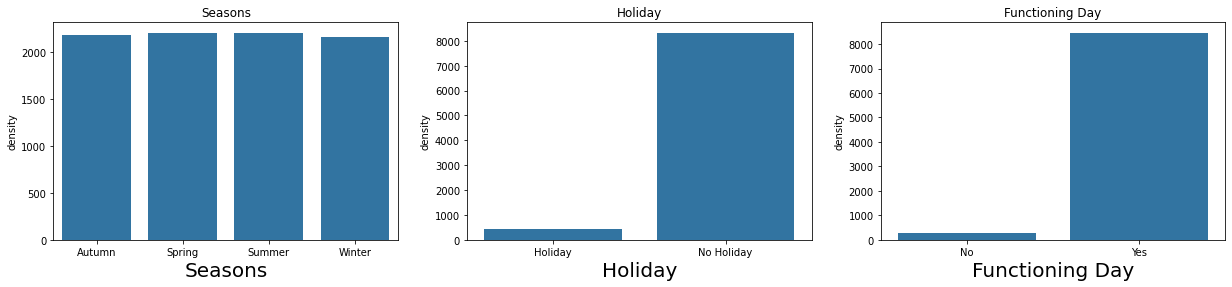

In [187]:
Cat_plot(df, cat_data)

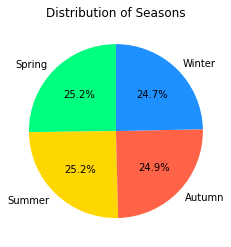

In [188]:
season_counts = df['Seasons'].value_counts(normalize=True)

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=['springgreen', 'gold', 'tomato', 'dodgerblue'])
plt.title('Distribution of Seasons')
plt.show()

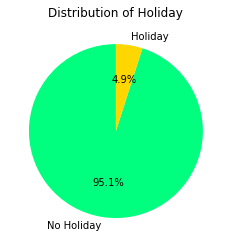

In [189]:
holiday_counts = df['Holiday'].value_counts(normalize=True)

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=90, colors=['springgreen', 'gold', 'tomato', 'dodgerblue'])
plt.title('Distribution of Holiday')
plt.show()

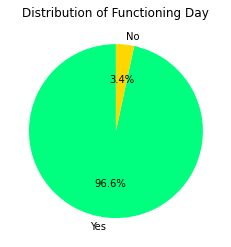

In [190]:
functioning_day_counts = df['Functioning Day'].value_counts(normalize=True)

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(functioning_day_counts, labels=functioning_day_counts.index, autopct='%1.1f%%', startangle=90, colors=['springgreen', 'gold', 'tomato', 'dodgerblue'])
plt.title('Distribution of Functioning Day')
plt.show()

### Bivariate Analysis

#### 1. Rented Bike Count Vs Hours 

Text(0.5, 1.0, 'Total Rented Bike Count by Hour')

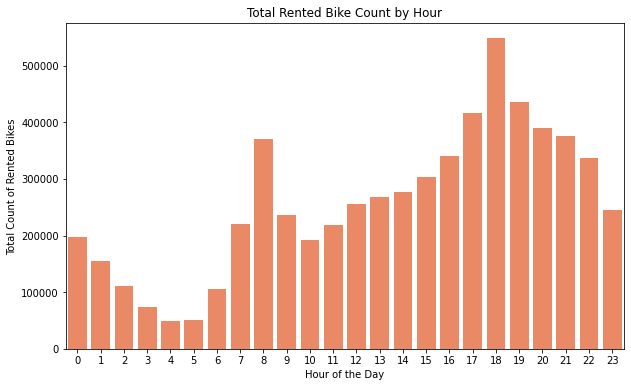

In [191]:
hourly_counts = df.groupby('Hour')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_counts, x='Hour', y='Rented Bike Count', color='coral')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Total Rented Bike Count by Hour')

#### 2. Rented Bike Count Vs Temperature(°C) 

Text(0.5, 1.0, 'Total Rented Bike Count by Temperature')

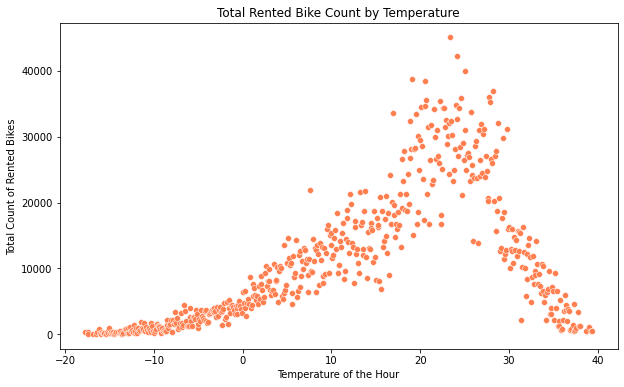

In [192]:
temp_counts = df.groupby('Temperature(°C)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_counts, x='Temperature(°C)', y='Rented Bike Count', color='coral')
plt.xlabel('Temperature of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Total Rented Bike Count by Temperature')

#### 3. Rented Bike Count Vs Humidity(%)

Text(0.5, 1.0, 'Total Rented Bike Count by Humidity(%)')

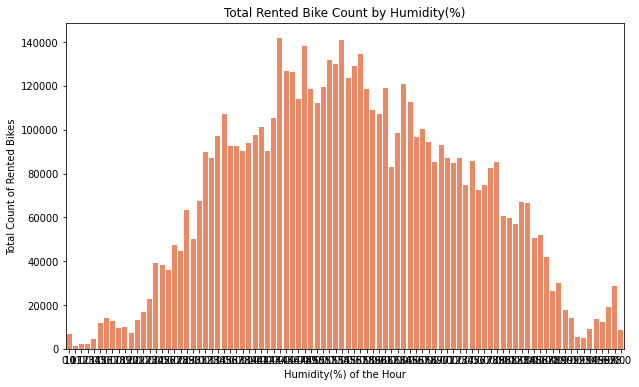

In [193]:
humidity_counts = df.groupby('Humidity(%)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=humidity_counts, x='Humidity(%)', y='Rented Bike Count', color='coral')
plt.xlabel('Humidity(%) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Total Rented Bike Count by Humidity(%)')

#### 4. Rented Bike Count Vs Wind speed (m/s)

Text(0.5, 1.0, 'Total Rented Bike Count by Wind speed (m/s)')

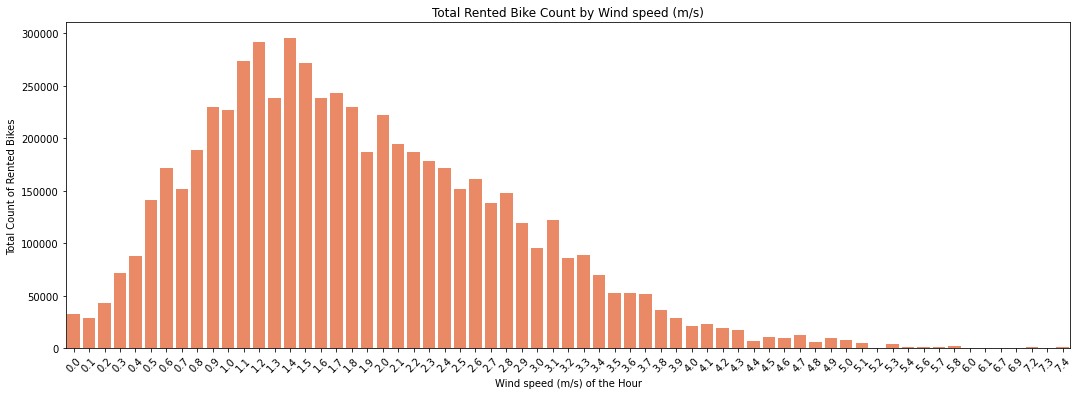

In [194]:
wind_speed_counts = df.groupby('Wind speed (m/s)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(data=wind_speed_counts, x='Wind speed (m/s)', y='Rented Bike Count', color='coral')
plt.xlabel('Wind speed (m/s) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Wind speed (m/s)')

#### 5. Rented Bike Count Vs Visibility (10m)

Text(0.5, 1.0, 'Total Rented Bike Count by Visibility (10m)')

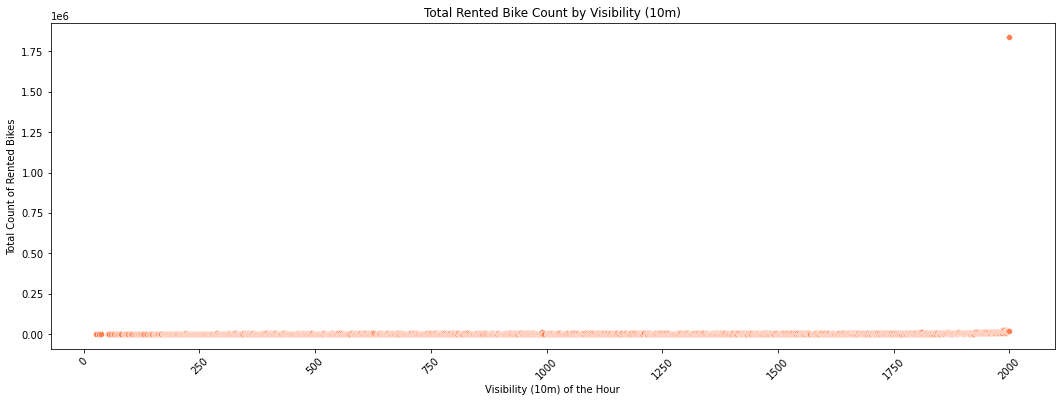

In [195]:
visibility_counts = df.groupby('Visibility (10m)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.scatterplot(data=visibility_counts, x='Visibility (10m)', y='Rented Bike Count', color='coral')
plt.xlabel('Visibility (10m) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Visibility (10m)')

In [196]:
df[df['Visibility (10m)'] == 2000 ]['Rented Bike Count'].sum()

1836690

In [197]:
visibility_counts

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


In [198]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day'],
      dtype='object')

#### 6. Rented Bike Count Vs Dew point temperature(°C)

Text(0.5, 1.0, 'Total Rented Bike Count by Dew point temperature(°C)')

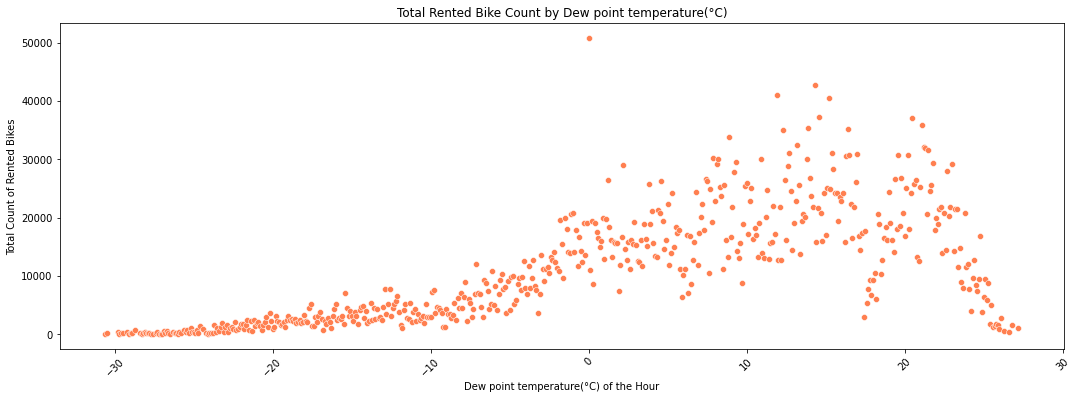

In [199]:
dewTemp_counts = df.groupby('Dew point temperature(°C)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.scatterplot(data=dewTemp_counts, x='Dew point temperature(°C)', y='Rented Bike Count', color='coral')
plt.xlabel('Dew point temperature(°C) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Dew point temperature(°C)')

#### 7. Rented Bike Count Vs Solar Radiation (MJ/m2)

Text(0.5, 1.0, 'Total Rented Bike Count by Solar Radiation (MJ/m2)')

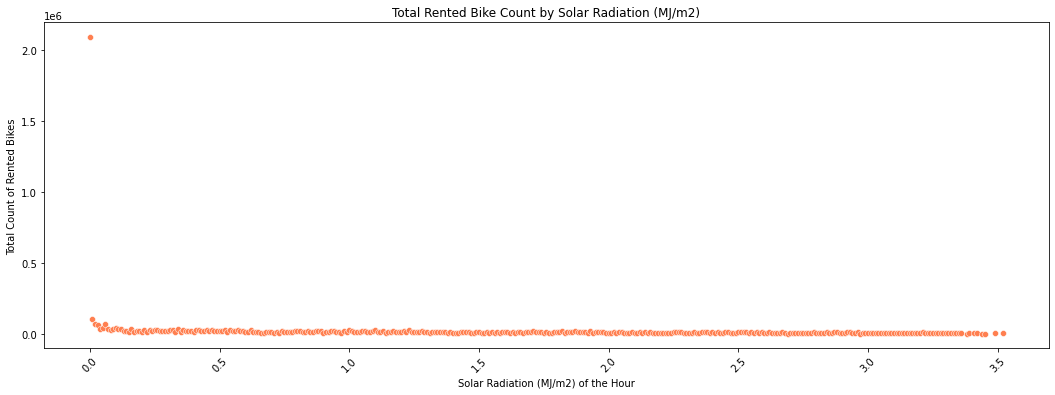

In [200]:
radiation_counts = df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.scatterplot(data=radiation_counts, x='Solar Radiation (MJ/m2)', y='Rented Bike Count', color='coral')
plt.xlabel('Solar Radiation (MJ/m2) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Solar Radiation (MJ/m2)')

In [201]:
r1 = radiation_counts[radiation_counts['Solar Radiation (MJ/m2)'] > 0.0]

Text(0.5, 1.0, 'Total Rented Bike Count by Solar Radiation (MJ/m2)')

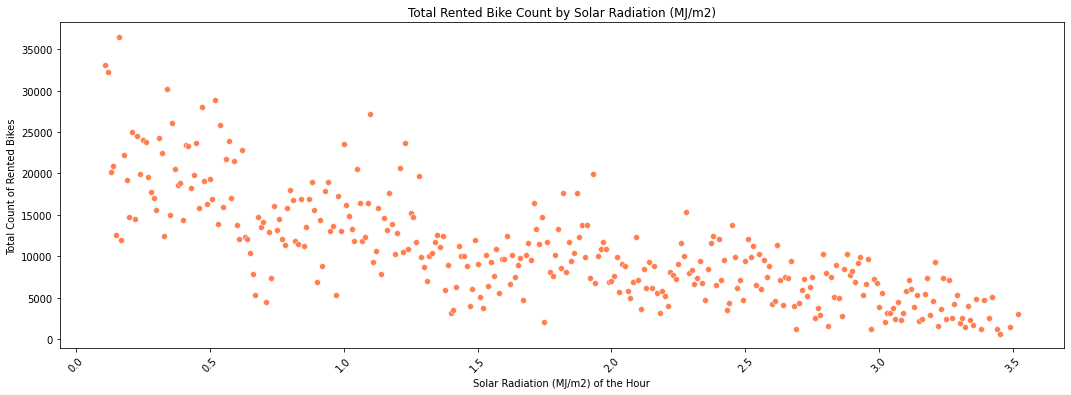

In [202]:
radiation_counts = df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].sum().reset_index()
r1 = radiation_counts[radiation_counts['Solar Radiation (MJ/m2)'] > 0.1]
plt.figure(figsize=(18, 6))
sns.scatterplot(data=r1, x='Solar Radiation (MJ/m2)', y='Rented Bike Count', color='coral')
plt.xlabel('Solar Radiation (MJ/m2) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Solar Radiation (MJ/m2)')

#### 8. Rented Bike Count Vs Rainfall(mm)

Text(0.5, 1.0, 'Total Rented Bike Count by Rainfall(mm)')

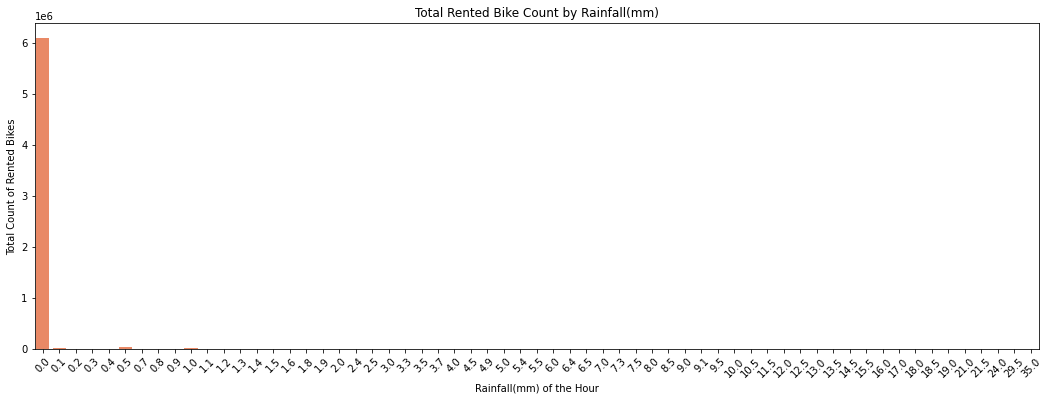

In [203]:
rainfall_counts = df.groupby('Rainfall(mm)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(data=rainfall_counts, x='Rainfall(mm)', y='Rented Bike Count', color='coral')
plt.xlabel('Rainfall(mm) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Rainfall(mm)')

Text(0.5, 1.0, 'Total Rented Bike Count by Rainfall(mm)')

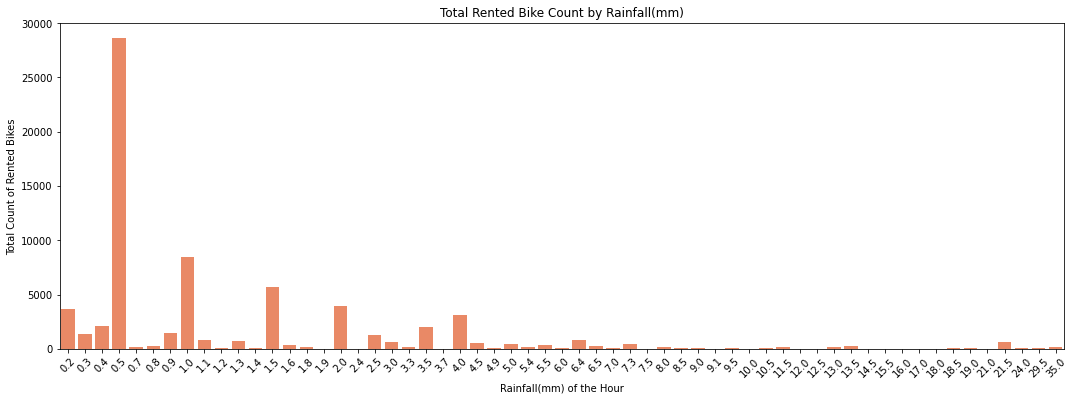

In [204]:
rainfall_counts = df.groupby('Rainfall(mm)')['Rented Bike Count'].sum().reset_index()
r2 = rainfall_counts[rainfall_counts['Rainfall(mm)'] > 0.1]
plt.figure(figsize=(18, 6))
sns.barplot(data=r2, x='Rainfall(mm)', y='Rented Bike Count', color='coral')
plt.xlabel('Rainfall(mm) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Rainfall(mm)')

#### 9. Rented Bike Count Vs Snowfall (cm)

Text(0.5, 1.0, 'Total Rented Bike Count by Snowfall (cm)')

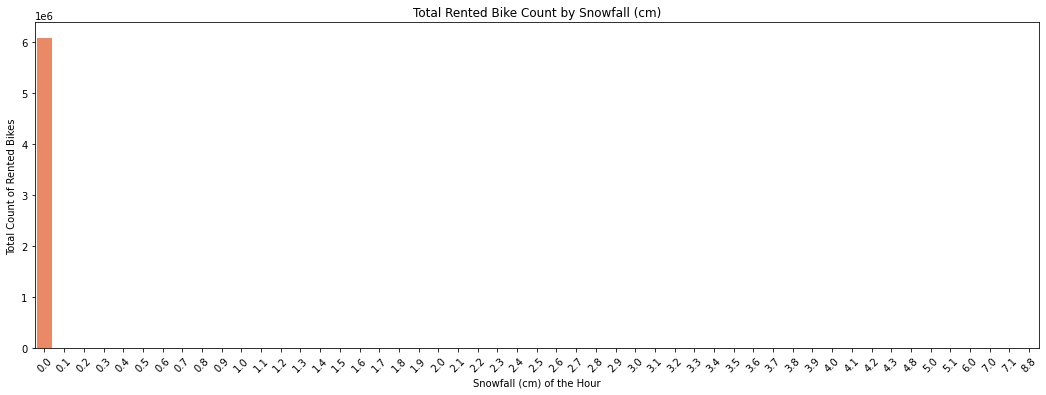

In [205]:
snowfall_counts = df.groupby('Snowfall (cm)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(data=snowfall_counts, x='Snowfall (cm)', y='Rented Bike Count', color='coral')
plt.xlabel('Snowfall (cm) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Snowfall (cm)')

Text(0.5, 1.0, 'Total Rented Bike Count by Snowfall (cm)')

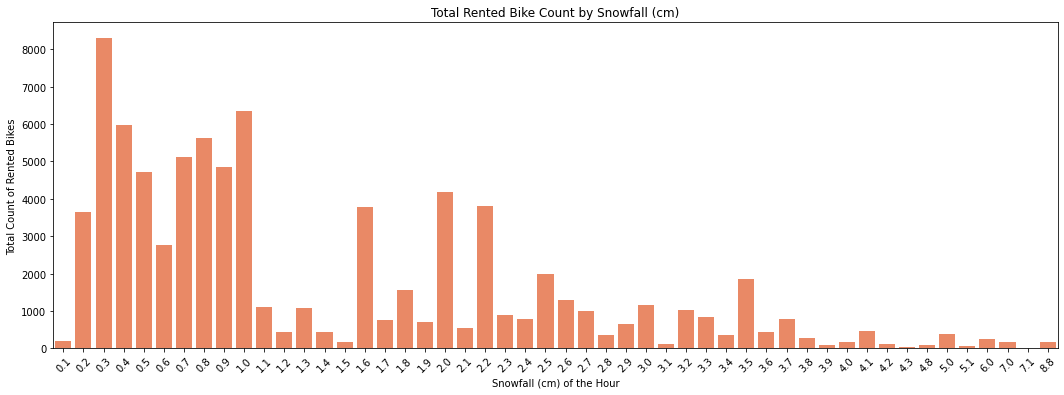

In [206]:
snowfall_counts = df.groupby('Snowfall (cm)')['Rented Bike Count'].sum().reset_index()
r3 = snowfall_counts[snowfall_counts['Snowfall (cm)'] > 0]
plt.figure(figsize=(18, 6))
sns.barplot(data=r3, x='Snowfall (cm)', y='Rented Bike Count', color='coral')
plt.xlabel('Snowfall (cm) of the Hour')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Snowfall (cm)')

In [207]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day'],
      dtype='object')

#### 10. Rented Bike Count Vs Seasons

Text(0.5, 1.0, 'Total Rented Bike Count by Seasons')

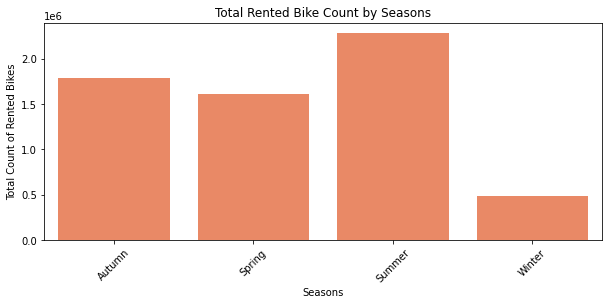

In [208]:
season_counts = df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=season_counts, x='Seasons', y='Rented Bike Count', color='coral')
plt.xlabel('Seasons')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Seasons')

#### 11. Rented Bike Count Vs Holiday

Text(0.5, 1.0, 'Total Rented Bike Count by Holiday')

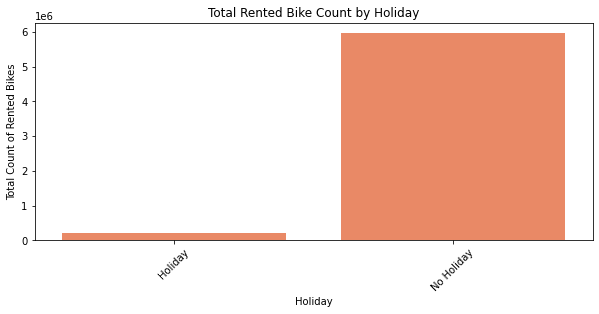

In [209]:
holiday_counts = df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=holiday_counts, x='Holiday', y='Rented Bike Count', color='coral')
plt.xlabel('Holiday')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Holiday')

#### 12. Rented Bike Count Vs Functioning Day

Text(0.5, 1.0, 'Total Rented Bike Count by Functioning Day')

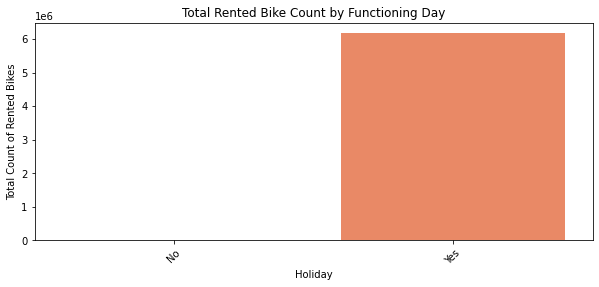

In [210]:
functioningday_counts = df.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=functioningday_counts, x='Functioning Day', y='Rented Bike Count', color='coral')
plt.xlabel('Holiday')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by Functioning Day')

#### 13. Rented Bike Count Vs year

Text(0.5, 1.0, 'Total Rented Bike Count by year')

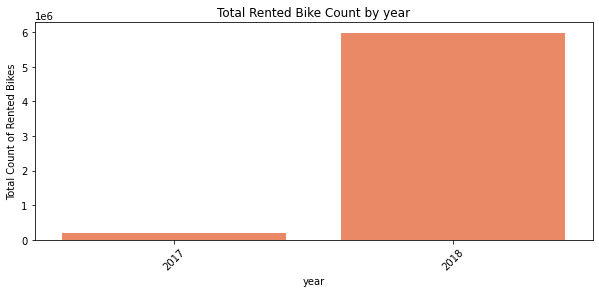

In [211]:
year_counts = df.groupby('year')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=year_counts, x='year', y='Rented Bike Count', color='coral')
plt.xlabel('year')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by year')

#### 14. Rented Bike Count Vs Months

Text(0.5, 1.0, 'Total Rented Bike Count by month')

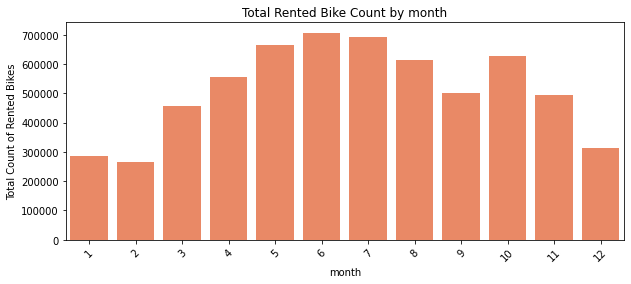

In [212]:
month_counts = df.groupby('month')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=month_counts, x='month', y='Rented Bike Count', color='coral')
plt.xlabel('month')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by month')

In [213]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day'],
      dtype='object')

#### 15. Rented Bike Count Vs Months

Text(0.5, 1.0, 'Total Rented Bike Count by day')

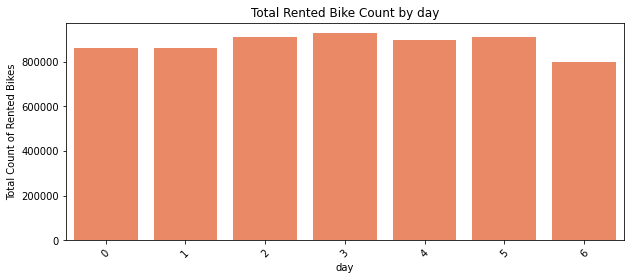

In [214]:
day_counts = df.groupby('day')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=day_counts, x='day', y='Rented Bike Count', color='coral')
plt.xlabel('day')
plt.ylabel('Total Count of Rented Bikes')
plt.xticks(rotation=45)
plt.title('Total Rented Bike Count by day')

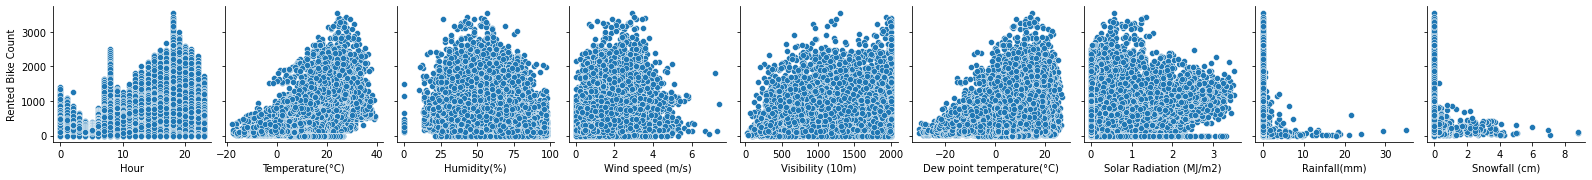

In [215]:
sns.pairplot(df,x_vars=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],y_vars='Rented Bike Count')

#### Conclusions: 

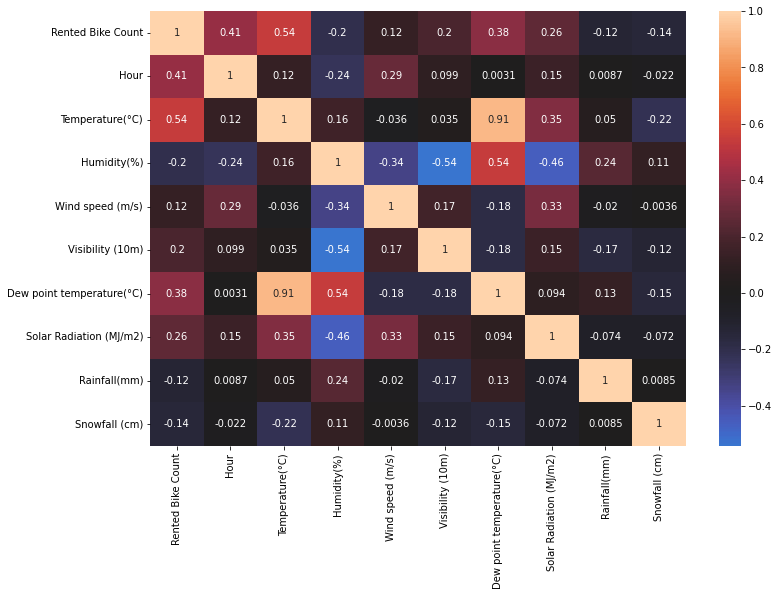

In [216]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float','int64']).corr(),annot=True,center = 0)
plt.show()

In [219]:
df.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [220]:
df.isnull().sum()

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
year                       0
month                      0
day                        0
dtype: int64

In [221]:
pd.to_pickle(df,'seoul_bike_sharing_pickle')